In [26]:
import pandas as pd
import numpy as np
df = pd.read_csv('bank_loan.csv')

In [27]:
df['CODE_GENDER'] = df['CODE_GENDER'].map({'M': 1, 'F': 0})
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})
df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].map({'Cash loans': 1, 'Revolving loans': 0})
df['NAME_TYPE_SUITE_INT'] = pd.factorize(df['NAME_TYPE_SUITE'])[0]
df['NAME_INCOME_TYPE_INT'] = pd.factorize(df['NAME_INCOME_TYPE'])[0]
df['NAME_FAMILY_STATUS_INT'] = pd.factorize(df['NAME_FAMILY_STATUS'])[0]
df['OCCUPATION_TYPE_INT'] = pd.factorize(df['OCCUPATION_TYPE'])[0]

df.to_csv("normalized_dataset.csv", index=False)

In [28]:
data = pd.read_csv("normalized_dataset.csv")
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE_INT,NAME_INCOME_TYPE_INT,NAME_FAMILY_STATUS_INT,OCCUPATION_TYPE_INT
0,100002,1,1,1.0,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
1,100003,0,1,0.0,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
2,100004,0,0,1.0,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,100006,0,1,0.0,0,1,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0
4,100007,0,1,1.0,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,1.0,0,0,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4,5
307507,456252,0,1,0.0,0,1,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,3,3,-1
307508,456253,0,1,0.0,0,1,0,153000.0,677664.0,29979.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0,0,4,3
307509,456254,1,1,0.0,0,1,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2,1,0


In [29]:
unwanted=[
'NAME_TYPE_SUITE',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'OCCUPATION_TYPE',
'WEEKDAY_APPR_PROCESS_START',
'ORGANIZATION_TYPE',
'FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE']
data.drop(labels=unwanted,axis=1,inplace=True)

In [30]:
columns_with_nan = data.columns[data.isna().any()].tolist()
print(columns_with_nan)

['CODE_GENDER', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 

In [31]:
data[columns_with_nan] = data[columns_with_nan].fillna(method='ffill')

data[columns_with_nan] = data[columns_with_nan].fillna(method='bfill')

In [32]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index([], dtype='object')

In [33]:
print(data.columns.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APAR

In [34]:
from sklearn.model_selection import train_test_split

X = data.drop('TARGET', axis=1)
y = data['TARGET']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [35]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)


In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])


In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
#from urllib import request
#import urllib2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
import joblib

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from qiskit import QuantumCircuit, transpile, Aer, execute, assemble
from qiskit.quantum_info import state_fidelity
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

# Training set

In [40]:
model = Sequential()


model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))


model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.save('classical_nn_model.h5')

In [41]:
# Function to extract activations from the 2nd last hidden layer
def get_activations(model, layer_index, X):
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.layers[layer_index].output)
    activations = intermediate_layer_model.predict(X)
    return activations
layer_index = -2

In [42]:
activations = get_activations(model, layer_index, X_train)

In [43]:
def quantum(sample_idx_to_print, activations):
    num_qubits = activations.shape[1]
    qc = QuantumCircuit(num_qubits, num_qubits)  # Include classical bits for measurements
    
    # Apply Hadamard gates to all qubits
    qc.h(range(num_qubits))
    
    # Apply controlled-Z gates to create entanglement
    for i in range(num_qubits - 1):
        for j in range(i + 1, num_qubits):
            qc.cz(i, j)
    
    # Apply parameterized single-qubit rotations based on activations
    for i in range(num_qubits):
        angle = activations[sample_idx_to_print, i]
        qc.rx(angle, i)  # Use Rx gate instead of U gate for simplicity
        
    qc.barrier()  # Add a barrier before measurements (optional)
    
    # Measure all qubits
    qc.measure(range(num_qubits), range(num_qubits))
    
    return qc


In [ ]:
from qiskit import QuantumCircuit, transpile, Aer, execute, QuantumRegister, assemble

magnitudes = []
for i in range(len(activations)):
    print(activations[i])
    qc = quantum(i, activations)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()

    state = result.get_statevector()
    mag = np.abs(state)
    print(mag)
    magnitudes.append(mag)

print(magnitudes)

In [ ]:
magnitudes_array = np.array(magnitudes)
np.save('magnitudes.npy', magnitudes_array)

In [44]:
import numpy as np

# Load the .npy file
magnitudes_array = np.load('magnitudes.npy')

In [45]:
magnitudes_array.shape

(153755, 16)

In [62]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

# Convert magnitudes and target values to numpy arrays
target_values_array = np.array(y_train)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(magnitudes_array, target_values_array)

# Split data into training and testing sets
X_train_mag, X_test_mag, y_train_mag, y_test_mag = train_test_split(magnitudes_array, target_values_array, test_size=0.2, random_state=42)

# Training

In [47]:
from qiskit import Aer


In [63]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
import joblib

# Training Phase
# Define a function to create the Keras model
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0):
    model = Sequential([
        Dense(128, activation=activation, input_shape=(len(X_train_mag[0]),)),
        Dropout(dropout_rate),
        Dense(64, activation=activation),
        Dropout(dropout_rate),
        Dense(32, activation=activation),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier wrapper for use in scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=1)

# Define the grid search parameters
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'dropout_rate': [0.0, 0.1, 0.2]  # Add dropout rates to the grid search
}

# Learning rate scheduler
def lr_scheduler(epoch):
    return 1e-3 * 0.9 ** epoch

lr_schedule = LearningRateScheduler(lr_scheduler)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform grid search using 5-fold cross validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid_result = grid.fit(X_train_mag, y_train_mag, callbacks=[lr_schedule, early_stopping])

# Save the best quantum neural network model
best_quantum_nn = grid_result.best_estimator_.model
best_quantum_nn.save('quantum_nn_model.h5')

# Create a dictionary to save the grid search results without the model
grid_result_data = {
    'best_score_': grid_result.best_score_,
    'best_params_': grid_result.best_params_,
    'cv_results_': grid_result.cv_results_
}

# Save the grid search results using joblib
joblib.dump(grid_result_data, 'grid_result_data.pkl')

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
769/769 [==============================] - 0s 376us/step - loss: 0.2842 - accuracy: 0.9185
[CV] END ..activation=relu, dropout_rate=0.0, optimizer=adam; total time=   4.3s
769/769 [==============================] - 0s 372us/step - loss: 0.2769 - accuracy: 0.9218
[CV] END ..activation=relu, dropout_rate=0.0, optimizer=adam; total time=   3.3s
769/769 [==============================] - 0s 386us/step - loss: 0.2870 - accuracy: 0.9172
[CV] END ..activation=relu, dropout_rate=0.0, optimizer=adam; total time=   5.8s
769/769 [==============================] - 0s 391us/step - loss: 0.2836 - accuracy: 0.9181
[CV] END ..activation=relu, dropout_rate=0.0, optimizer=adam; total time=   2.9s
769/769 [==============================] - 0s 375us/step - loss: 0.2750 - accuracy: 0.9215
[CV] END ..activation=relu, dropout_rate=0.0, optimizer=adam; total time=   3.1s
769/769 [==============================] - 0s 430us/step - loss: 0.2851 - accur

769/769 [==============================] - 0s 473us/step - loss: 0.2825 - accuracy: 0.9185
[CV] END ..activation=relu, dropout_rate=0.2, optimizer=adam; total time=   3.3s
769/769 [==============================] - 0s 439us/step - loss: 0.2745 - accuracy: 0.9218
[CV] END ..activation=relu, dropout_rate=0.2, optimizer=adam; total time=   3.5s
769/769 [==============================] - 0s 422us/step - loss: 0.2855 - accuracy: 0.9172
[CV] END ..activation=relu, dropout_rate=0.2, optimizer=adam; total time=   3.1s
769/769 [==============================] - 0s 441us/step - loss: 0.2839 - accuracy: 0.9181
[CV] END ..activation=relu, dropout_rate=0.2, optimizer=adam; total time=   3.2s
769/769 [==============================] - 0s 429us/step - loss: 0.2753 - accuracy: 0.9215
[CV] END ..activation=relu, dropout_rate=0.2, optimizer=adam; total time=   3.1s
769/769 [==============================] - 0s 439us/step - loss: 0.2861 - accuracy: 0.9185
[CV] END activation=relu, dropout_rate=0.2, optim

769/769 [==============================] - 0s 438us/step - loss: 0.2778 - accuracy: 0.9218
[CV] END ..activation=tanh, dropout_rate=0.1, optimizer=adam; total time=   3.4s
769/769 [==============================] - 0s 447us/step - loss: 0.2855 - accuracy: 0.9172
[CV] END ..activation=tanh, dropout_rate=0.1, optimizer=adam; total time=   3.4s
769/769 [==============================] - 0s 415us/step - loss: 0.2847 - accuracy: 0.9181
[CV] END ..activation=tanh, dropout_rate=0.1, optimizer=adam; total time=   3.3s
769/769 [==============================] - 0s 409us/step - loss: 0.2784 - accuracy: 0.9215
[CV] END ..activation=tanh, dropout_rate=0.1, optimizer=adam; total time=   3.3s
769/769 [==============================] - 0s 435us/step - loss: 0.2832 - accuracy: 0.9185
[CV] END activation=tanh, dropout_rate=0.1, optimizer=rmsprop; total time=   3.0s
769/769 [==============================] - 0s 449us/step - loss: 0.2765 - accuracy: 0.9218
[CV] END activation=tanh, dropout_rate=0.1, opti

769/769 [==============================] - 0s 380us/step - loss: 0.2862 - accuracy: 0.9172
[CV] END activation=sigmoid, dropout_rate=0.0, optimizer=adam; total time=   3.2s
769/769 [==============================] - 0s 395us/step - loss: 0.2839 - accuracy: 0.9181
[CV] END activation=sigmoid, dropout_rate=0.0, optimizer=adam; total time=   3.4s
769/769 [==============================] - 0s 439us/step - loss: 0.2757 - accuracy: 0.9215
[CV] END activation=sigmoid, dropout_rate=0.0, optimizer=adam; total time=   2.9s
769/769 [==============================] - 0s 441us/step - loss: 0.2831 - accuracy: 0.9185
[CV] END activation=sigmoid, dropout_rate=0.0, optimizer=rmsprop; total time=   2.8s
769/769 [==============================] - 0s 451us/step - loss: 0.2745 - accuracy: 0.9218
[CV] END activation=sigmoid, dropout_rate=0.0, optimizer=rmsprop; total time=   3.1s
769/769 [==============================] - 0s 439us/step - loss: 0.2863 - accuracy: 0.9172
[CV] END activation=sigmoid, dropout_r

769/769 [==============================] - 0s 452us/step - loss: 0.2876 - accuracy: 0.9172
[CV] END activation=sigmoid, dropout_rate=0.2, optimizer=adam; total time=   3.5s
769/769 [==============================] - 0s 448us/step - loss: 0.2842 - accuracy: 0.9181
[CV] END activation=sigmoid, dropout_rate=0.2, optimizer=adam; total time=   3.2s
769/769 [==============================] - 0s 455us/step - loss: 0.2754 - accuracy: 0.9215
[CV] END activation=sigmoid, dropout_rate=0.2, optimizer=adam; total time=   3.5s
769/769 [==============================] - 0s 446us/step - loss: 0.2825 - accuracy: 0.9185
[CV] END activation=sigmoid, dropout_rate=0.2, optimizer=rmsprop; total time=   3.3s
769/769 [==============================] - 0s 412us/step - loss: 0.2745 - accuracy: 0.9218
[CV] END activation=sigmoid, dropout_rate=0.2, optimizer=rmsprop; total time=   3.3s
769/769 [==============================] - 0s 445us/step - loss: 0.2856 - accuracy: 0.9172
[CV] END activation=sigmoid, dropout_r

In [64]:
import numpy as np

# Load the .npy file

data = np.load('magnitudes_test.npy')
y_test_array = np.array(y_test)


In [65]:
import numpy as np
import joblib
#grid_result = joblib.load('grid_result.pkl')
best_model = grid_result.best_estimator_.model
history = best_model.fit(X_train_mag, y_train_mag, epochs=100, validation_data=(data, y_test), verbose=1)

history_data1 = history.history
with h5py.File('training_history.h5', 'w') as hf:
    for key, values in history_data1.items():
        hf.create_dataset(key, data=np.array(values))


Epoch 1/100
3844/3844 [==============================] - 4s 1ms/step - loss: 0.2814 - accuracy: 0.9194 - val_loss: 0.2812 - val_accuracy: 0.9191
Epoch 2/100
3844/3844 [==============================] - 4s 1ms/step - loss: 0.2811 - accuracy: 0.9194 - val_loss: 0.2823 - val_accuracy: 0.9191
Epoch 3/100
3844/3844 [==============================] - 4s 1ms/step - loss: 0.2811 - accuracy: 0.9194 - val_loss: 0.2814 - val_accuracy: 0.9191
Epoch 4/100
3844/3844 [==============================] - 4s 993us/step - loss: 0.2810 - accuracy: 0.9194 - val_loss: 0.2820 - val_accuracy: 0.9191
Epoch 5/100
3844/3844 [==============================] - 4s 1ms/step - loss: 0.2809 - accuracy: 0.9194 - val_loss: 0.2821 - val_accuracy: 0.9191
Epoch 6/100
3844/3844 [==============================] - 4s 1ms/step - loss: 0.2808 - accuracy: 0.9194 - val_loss: 0.2812 - val_accuracy: 0.9191
Epoch 7/100
3844/3844 [==============================] - 4s 1ms/step - loss: 0.2807 - accuracy: 0.9194 - val_loss: 0.2812 - val_

3844/3844 [==============================] - 4s 1ms/step - loss: 0.2803 - accuracy: 0.9194 - val_loss: 0.2809 - val_accuracy: 0.9191
Epoch 58/100
3844/3844 [==============================] - 4s 1ms/step - loss: 0.2803 - accuracy: 0.9194 - val_loss: 0.2809 - val_accuracy: 0.9191
Epoch 59/100
3844/3844 [==============================] - 4s 1ms/step - loss: 0.2803 - accuracy: 0.9194 - val_loss: 0.2812 - val_accuracy: 0.9191
Epoch 60/100
3844/3844 [==============================] - 4s 1ms/step - loss: 0.2803 - accuracy: 0.9194 - val_loss: 0.2810 - val_accuracy: 0.9191
Epoch 61/100
3844/3844 [==============================] - 4s 1ms/step - loss: 0.2803 - accuracy: 0.9194 - val_loss: 0.2810 - val_accuracy: 0.9191
Epoch 62/100
3844/3844 [==============================] - 4s 1ms/step - loss: 0.2803 - accuracy: 0.9194 - val_loss: 0.2809 - val_accuracy: 0.9191
Epoch 63/100
3844/3844 [==============================] - 4s 1ms/step - loss: 0.2803 - accuracy: 0.9194 - val_loss: 0.2811 - val_accuracy

NameError: name 'h5py' is not defined

In [57]:
import numpy as np
import joblib
#grid_result = joblib.load('grid_result.pkl')
best_model = grid_result.best_estimator_.model
history = best_model.fit(X_train_mag, y_train_mag, epochs=20, validation_data=(data, y_test), verbose=1)

history_data = history.history
with h5py.File('training_history_new.h5', 'w') as hf:
    for key, values in history_data.items():
        hf.create_dataset(key, data=np.array(values))


Epoch 1/20
7069/7069 [==============================] - 6s 857us/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.7023 - val_accuracy: 0.0809
Epoch 2/20
7069/7069 [==============================] - 6s 855us/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.7013 - val_accuracy: 0.0809
Epoch 3/20
7069/7069 [==============================] - 6s 879us/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.0809
Epoch 4/20
7069/7069 [==============================] - 6s 865us/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6949 - val_accuracy: 0.0809
Epoch 5/20
7069/7069 [==============================] - 6s 883us/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6945 - val_accuracy: 0.0809
Epoch 6/20
7069/7069 [==============================] - 6s 904us/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6859 - val_accuracy: 0.9191
Epoch 7/20
7069/7069 [==============================] - 7s 1ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6922 - v

NameError: name 'h5py' is not defined

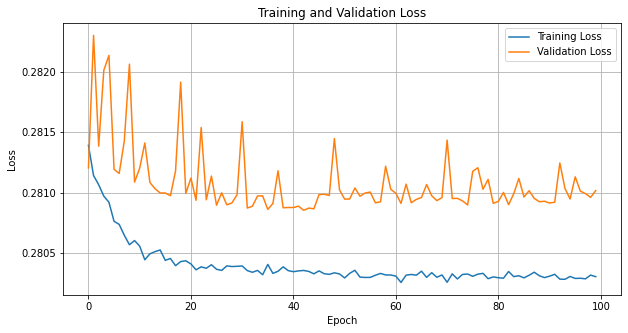

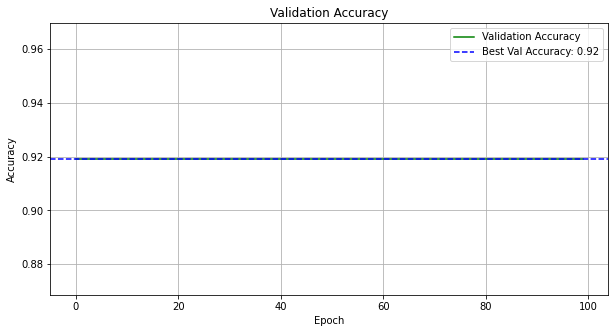

In [67]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig('final_validation_loss.svg', format='svg')
plt.show()

# Plot best validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.axhline(y=best_val_accuracy, color='b', linestyle='--', label=f'Best Val Accuracy: {best_val_accuracy:.2f}')
plt.legend()
plt.grid(True)
plt.savefig('final_best_validation_accuracy.svg', format='svg')
plt.show()


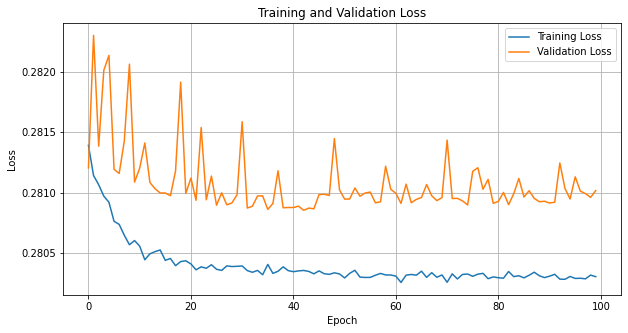

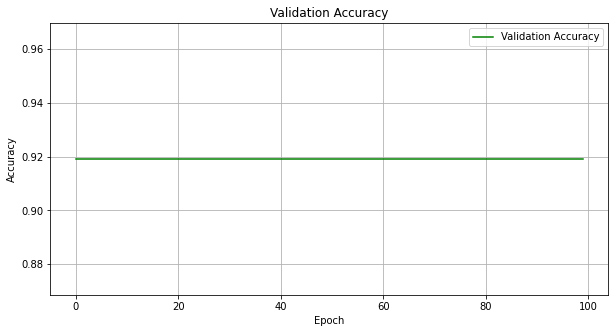

Final Validation Accuracy: 0.92


In [66]:
import matplotlib.pyplot as plt

# Assuming history contains the training history from the best model fit

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig('training_validation_loss.svg', format='svg')
plt.show()

# Plot validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('validation_accuracy.svg', format='svg')
plt.show()

# Print final validation accuracy
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}")


In [68]:
# Print the final validation accuracy
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")

Final Validation Accuracy: 91.91%


# testing accuracy

In [69]:
from sklearn.metrics import accuracy_score
#magnitudes_test_array = np.array(magnitudes_test)
y_test_array = np.array(y_test)

# Access the best estimator (model) found during grid search
best_model = grid_result.best_estimator_.model

# Get predictions on the preprocessed testing data
y_pred = best_model.predict(data)

# Convert predictions to binary labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
test_accuracy = accuracy_score(y_test_array, y_pred_binary)

print("Test Accuracy:", test_accuracy)




Test Accuracy: 0.9191446187465855


# test accuracy on resampled data

In [61]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(data, y_test)

X_train_test_mag, X_test_test_mag, y_train_test_mag, y_test_test_mag = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#magnitudes_test_array = np.array(magnitudes_test)
#y_test_array = np.array(y_test)

# Access the best estimator (model) found during grid search
best_model = grid_result.best_estimator_.model

# Get predictions on the preprocessed testing data
y_pred = best_model.predict(X_train_test_mag)

# Convert predictions to binary labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
test_accuracy = accuracy_score(y_train_test_mag, y_pred_binary)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.500455514377449


In [33]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming y_train and y_test are already defined as your training and testing labels
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Create and fit the model with class weights
model = RandomForestClassifier(class_weight=class_weights_dict)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96    141324
           1       0.20      0.00      0.00     12432

    accuracy                           0.92    153756
   macro avg       0.56      0.50      0.48    153756
weighted avg       0.86      0.92      0.88    153756

